In [ ]:
info = {
 "title": "Snowman & Robin",
 "author": "Alex Carney",
 "github_username": "alcarney",
 "stylo_version": "0.9.0",
 "dimensions": (1920, 1080)
}

In [1]:
import numpy as np
from math import pi

from stylo.domain.transform import translate, rotate
from stylo.color import FillColor
from stylo.shape import Circle, Ellipse, Shape, Triangle, Line
from stylo.image import LayeredImage

In [2]:
white = FillColor("ffffff")
black = FillColor()
orange = FillColor("ffa500")
lightbrown = FillColor("cd853f")
red = FillColor("ff0000")

In [3]:
class Nose(Shape):
    
    def __init__(self, scale=1):
        self.scale = scale
    
    def draw(self):
        
        base = Ellipse(fill=True, r=0.1)
        tri = Triangle((-0.2, 0), (0.2, 0), (0, 1.25))
        
        def nose(x, y):
            x = x / self.scale
            y = y / self.scale
            
            carrot = base(x=x, y=y)
            carrot = np.logical_or(carrot, tri(x=x, y=y))
            
            return carrot
    
        return nose
    
class Robin(Shape):
    
    def __init__(self, scale=1):
        self.scale = scale
    
    def draw(self):
        
        body = Circle(r=0.1, fill=True)
        tri = Triangle((0, -0.1), (0, 0.1), (0.2, -0.05))
        
        def robin(x, y):
            x = x / self.scale
            y = y / self.scale
            
            bird = body(x=x, y=y)
            bird = np.logical_or(bird, tri(x=x, y=y))
            return bird
            
        return robin
    
class Chest(Shape):
    
    def __init__(self, bird):
        self.bird = bird
        
    def draw(self):
        
        shape = Ellipse(x=-0.1, y=-0.2, a=1, b=1.5, r=0.15, fill=True)
        
        def chest(x, y):
            
            cutout = self.bird(x=x, y=y)
            return np.logical_and(shape(x=x, y=y), cutout)
            
        return chest

In [4]:
base_x = -0.4
base_y = -0.7
base = Circle(x=base_x, y=base_y, r=0.7, fill=True)
base_outline = Circle(x=base_x, y=base_y, r=0.71, fill=True)

mid_y = base_y + 0.8
mid = Circle(x=base_x, y=mid_y, r=0.55, fill=True)
mid_outline = Circle(x=base_x, y=mid_y, r=0.56, fill=True)

head_y = mid_y + 0.6
head = Circle(x=base_x, y=head_y, r=0.43, fill=True)
head_outline = Circle(x=base_x, y=head_y, r=0.44, fill=True)

eye_y = head_y + 0.1
eye_x = base_x + 0.2

leye = Ellipse(x=eye_x + 0.05, y=eye_y, r=0.03, a=1.2, b=1, fill=True)
reye = Circle(x=(eye_x + 0.2), y=eye_y + 0.05, r=0.04, fill=True)

button_y = mid_y
button_x = base_x + 0.55

button = Ellipse(x=button_x, y=button_y, a=1, b=1.6, r=0.03, fill=True)

button1 = Ellipse(a=1, b=1.6, r=0.03, fill=True) \
       >> rotate(-pi/12) \
       >> translate(button_x - 0.05, button_y + 0.2)

button2 = Ellipse(a=1, b=1.6, r=0.03, fill=True) \
       >> rotate(pi/12) \
       >> translate(button_x - 0.05, button_y - 0.2)  

mouth_x = base_x + 0.35
mouth_y = head_y - 0.2

mouth = Ellipse(x=mouth_x, y=mouth_y, r=0.03, a=1.4, b=1, fill=True)
mouth1 = Ellipse(x=mouth_x - 0.1, y=mouth_y, r=0.03, a=1.3, b=1, fill=True)
mouth2 = Ellipse(x=mouth_x - 0.2, y=mouth_y + 0.04, r=0.03, a=1.2, b=1, fill=True)

nose = Nose(scale=0.45) >> rotate(pi/2) >> translate(0, 0.7)
nose_outline = Nose(scale=0.47) >> rotate(pi/2) >> translate(0, 0.7)

bird = Robin() >> translate(0.45, 0.83)
bird_outline = Robin(scale=1.05) >> translate(0.45, 0.83)
chest = Chest(bird_outline) >> translate(0.45, 0.83)

bird_eye = Circle(r=0.015, fill=True) >> translate(0.4, 0.89)
beak = Triangle((0.02, 0), (-0.02, 0), (0, 0.04)) >> rotate(3*pi/2) >> translate(0.38, 0.88)

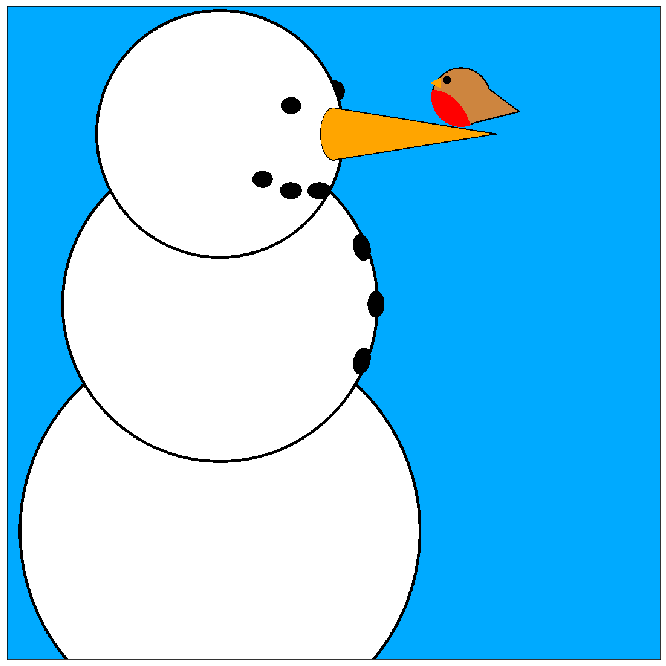

In [5]:
image = LayeredImage(background="00aaff", scale=2.3)

image.add_layer(base_outline, black)
image.add_layer(base, white)

image.add_layer(mid_outline, black)

image.add_layer(mid, white)

image.add_layer(head_outline, black)
image.add_layer(reye, black)
image.add_layer(head, white)

image.add_layer(leye, black)

image.add_layer(button, black)
image.add_layer(button1, black)
image.add_layer(button2, black)

image.add_layer(mouth, black)
image.add_layer(mouth1, black)
image.add_layer(mouth2, black)

image.add_layer(nose_outline, black) 
image.add_layer(nose, orange) 

image.add_layer(bird_outline, black)
image.add_layer(bird, lightbrown)
image.add_layer(chest, red)
image.add_layer(bird_eye, black)
image.add_layer(beak, orange)